In [1]:
# Step 1: Load the Dataset
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('Customers_details.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
# Step 3: Feature Selection
# Rename columns for easier access
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

# Select relevant features for clustering
# Example: Using 'Annual Income', 'Spending Score', and 'Age'
X = df[['Annual Income', 'Spending Score']]
     

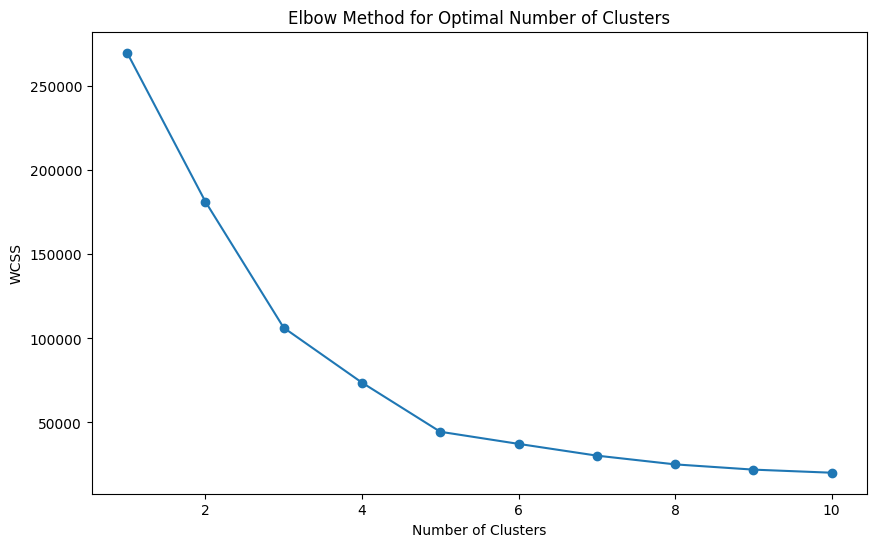

In [3]:
# Step 4: Implement K-means Clustering
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters (let's say k=5 for this example)
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
     

Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
Cluster Labels:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


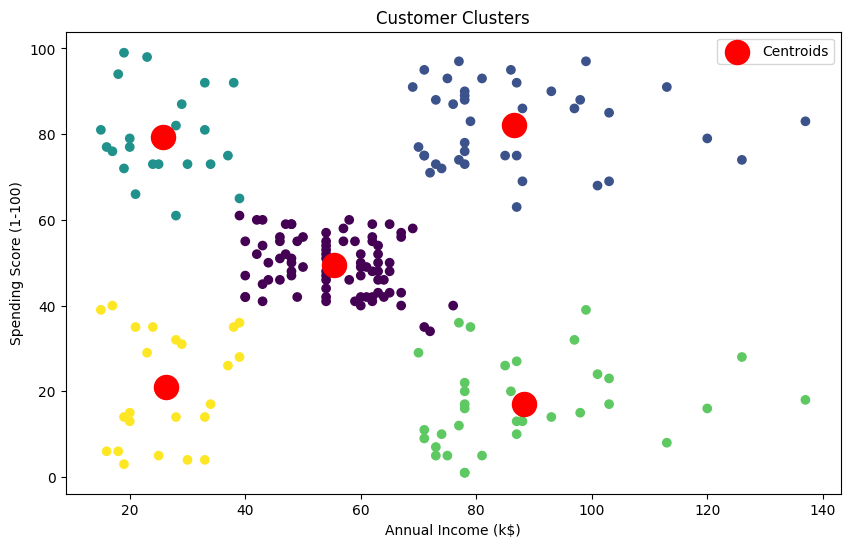

In [4]:

# Step 5: Evaluate the Clusters
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Labels:\n", df['Cluster'].value_counts())

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
